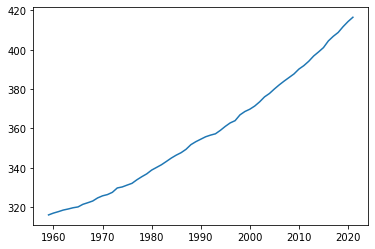

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dat = pd.read_csv("co2level.csv")
year = dat["Year"]
ppm = dat["PPM"]
plt.plot(year,ppm)

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:                 ARIMA(0, 2, 3)   Log Likelihood                 -41.851
Date:                Mon, 07 Nov 2022   AIC                             91.702
Time:                        14:37:58   BIC                            100.146
Sample:                             0   HQIC                            95.011
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7749      0.147     -5.272      0.000      -1.063      -0.487
ma.L2         -0.2050      0.193     -1.063      0.288      -0.583       0.173
ma.L3          0.2401      0.128      1.876      0.0

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


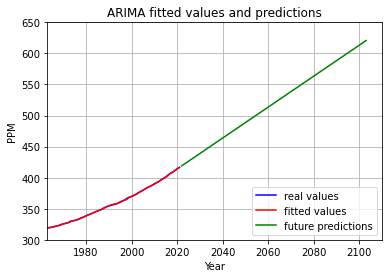

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import matplotlib.pyplot as plt
dat = pd.read_csv("co2level.csv")

ppm = np.diff(dat["PPM"],2)
year = dat["Year"].tail(61)

# plot_acf(ppm).show()
# print("ADF test results: ",ADF(ppm))


from statsmodels.stats.diagnostic import acorr_ljungbox
# print("background noise test results:",acorr_ljungbox(ppm,lags=1))

from statsmodels.tsa.arima.model import ARIMA

# ppm = ppm.astype(float)
# bic_matrix = []
# for p in range(7):
#     temp = []
#     for q in range(7):
#          try:
#             temp.append(ARIMA(ppm,order=(p,2,q)).fit().bic)
#          except:
#             temp.append(None)
#     bic_matrix.append(temp)
#
# print(bic_matrix)
#
# bic_matrix = pd.dataFrame(bic_matrix)
# p,q = bic_matrix.idxmin()
# print(p," ",q)

# best is (0,2,3)
temp = []
for i in dat["PPM"]:
    temp.append(i)

newppm = pd.Series(temp,index=dat["Year"])

model = ARIMA(newppm,order=(0,2,3)).fit()
print(model.summary())

# vals = model.fittedvalues
# temp = []
# for i in vals:
#     temp.append(i)
# this = pd.Series(temp,index=dat["Year"])
# #model.forecast(5)
# forecas = model.forecast(79)
# forecastStorage = [[],[]]
# for i in range(79):
#    forecastStorage[0].append(forecas[i][1])
#     forecastStorage[1].append(i+2022)
# print(forecas)

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(newppm,color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
this = model.forecast(82)
temp = []
for i in this:
    temp.append(i)
temp2 = []
for i in range(2022,2104):
    temp2.append(i)
forc = pd.Series(temp,index=temp2)
ax.plot(forc, color="green",label="future predictions")
plt.legend(loc="lower right")
plt.xlim([1963,2110])
plt.ylim([300,650])
plt.title("ARIMA fitted values and predictions")
plt.ylabel("PPM")
plt.xlabel("Year")
# plt.savefig("future.png",dpi=300)


# plt.savefig("omg.png",dpi=500)

print("PPM in 2021: ",dat["PPM"][62])
print("PPM in 2050, forecasted: ",model.forecast(29)[91])
print("PPM in 2100, forecasted: ",model.forecast(79)[141])
print("685 PPM, forecasted: ",model.forecast(108)[170])
# 1959

C:\Users\Kingster\AppData\Local\Temp\ipykernel_5936\3646981894.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(ppm).show()


ADF test statistic:  -5.73305330647872
ADF test p-value:  6.532757429063579e-07
ljung-box test results:     lb_stat  lb_pvalue
1  9.267213   0.002333


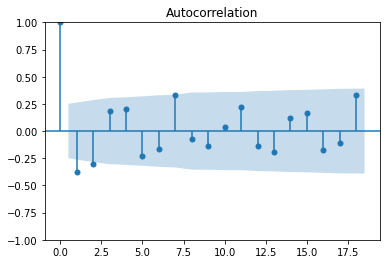

In [117]:
# THIS IS ADF TEST COMPONENT

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_csv("co2level.csv")
ppm = np.diff(data["PPM"],2)
plot_acf(ppm).show()
print("ADF test statistic: ",ADF(ppm)[0])
print("ADF test p-value: ",ADF(ppm)[1])
print("ljung-box test results:",acorr_ljungbox(ppm,lags=1))

In [102]:
# THIS IS LJUNG BOX TEST
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd
import numpy as np
data = pd.read_csv("co2level.csv")
ppm = np.diff(data["PPM"],2)
print("test results:",acorr_ljungbox(ppm,lags=5))

test results:      lb_stat  lb_pvalue
1   9.267213   0.002333
2  15.276589   0.000482
3  17.433442   0.000576
4  20.112075   0.000475
5  23.663740   0.000252
